In [17]:
import cv2 #importing opencv
import numpy as np
import matplotlib.pyplot as plt
#all the cv2 functions are taken from internet and OpenCV documentation

## Part 1

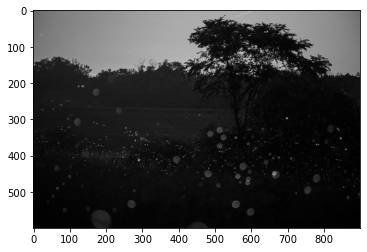

<BarContainer object of 256 artists>

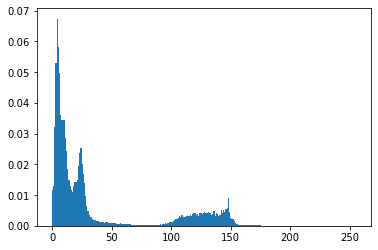

In [5]:
#citation aksh garg(photo taken)
nightimg = cv2.imread('nightshot.jpg',0)
plt.imshow(nightimg,cmap='gray')
plt.show()
histogram=[]   #creating histogram arr
x_array=[]    #creating index arr
for i in range (0,256):   #making each ele of histogram to 0 and x_array to index
    histogram.append(0)
    x_array.append(i)
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        histogram[nightimg[i][j]] += 1  #counting no of pixels with given intensity
for i in range (0,256):
    histogram[i] /= nightimg.size  #taking average

plt.bar(x_array,histogram,width=1)

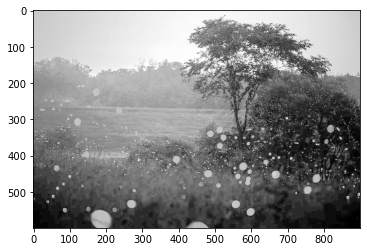

<BarContainer object of 256 artists>

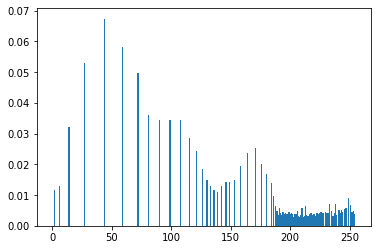

In [6]:
cdf = []
cdf.append(histogram[0])
for i in range (1,256):
    cdf.append(histogram[i]+cdf[i-1])
for i in range (0,nightimg.shape[0]):
    for j in range(0,nightimg.shape[1]):
        nightimg[i][j] = (cdf[nightimg[i][j]]*255)
for i in range (0,256):  
    histogram[i]=0
for i in range (0,nightimg.shape[0]):
    for j in range (0,nightimg.shape[1]):
        histogram[nightimg[i][j]] += 1  #counting no of pixels with given intensity
for i in range (0,256):
    histogram[i] /= nightimg.size  #taking average

plt.imshow(nightimg,cmap='gray')
plt.show()
plt.bar(x_array,histogram,width=1)    

## Part 2

In [7]:
img = cv2.imread('ink-dot.jpg',0) #reading image
n=img.shape[0]
m=img.shape[1]
cv2.imshow('image',img) #showing image
cv2.waitKey(0)   #window will show image for 1sec
cv2.destroyAllWindows() #destroys all windows


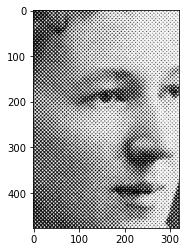

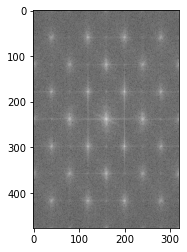

In [8]:
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)  # to make the complex dft of the image
dft_shift = np.fft.fftshift(dft)                            #shift the dft image to the center

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # take the magnitude of the dft values(complex)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

As we can see in magnitude spectrum, there is sinusoid noise at different frequencies. So, to remove this noise 
we will apply a mask which is 0 everywhere except the area near origin


(Text(0.5, 1.0, 'mask Image'), ([], []), ([], []))

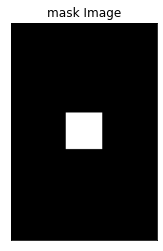

In [8]:
mask = np.zeros((n,m,2),dtype=np.uint8) #creating mask
#getting the centre of the shifted dft
cl = int(n/2)
cb = int(m/2)
mask[cl-40:cl+40,cb-40:cb+40]=1 #using array slicing for setting values to 1
plt.imshow(mask[:,:,0],cmap='gray')
plt.title('mask Image'), plt.xticks([]), plt.yticks([])
#plotting the mask

In [9]:
#multiplying the mask and the dft
dft_shift=dft_shift*mask
idft1=np.fft.ifftshift(dft_shift) #shifting the dft again
idft1=cv2.idft(idft1) #taking the idft using Opencv function
finalimg=(cv2.magnitude(idft1[:,:,0],idft1[:,:,1])) #taking the magnitude of idft

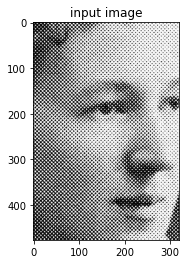

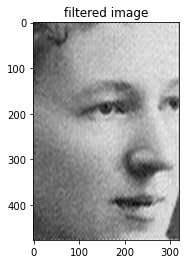

In [10]:
plt.imshow(img, cmap = 'gray')
plt.title('input image')
plt.show()
plt.imshow(finalimg, cmap = 'gray')
plt.title('filtered image')
plt.show()

We can see the comparison. The newspaper dot pattern is gone but at the cost of losing some information. Since we are applying a low pass filter we will loose out on high frequency content. But as given in question, we have reduced the dots.

## Part 3


In [2]:
#getting the image as RGB and splitting it in 3 binary images
img = cv2.imread('planet.jpg')
img1 = img[:,:,0]
img2 = img[:,:,1]
img3 = img[:,:,2]
n = img1.shape[0]
m = img1.shape[1]

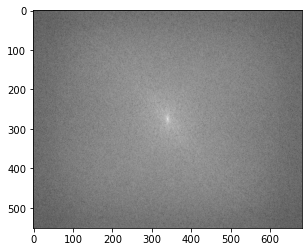

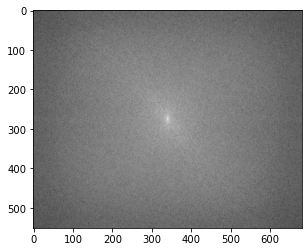

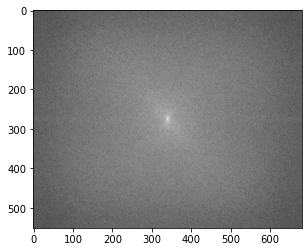

In [3]:
#finding the dft of each image
dft1 = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
dft2 = cv2.dft(np.float32(img2),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
dft3 = cv2.dft(np.float32(img3),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift3 = np.fft.fftshift(dft3)
magnitude_spectrum3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0],dft_shift3[:,:,1]))
#plotting the magnitude spectrum of each
plt.imshow(magnitude_spectrum1,cmap='gray')
plt.show()
plt.imshow(magnitude_spectrum2,cmap='gray')
plt.show()
plt.imshow(magnitude_spectrum3,cmap='gray')
plt.show()

As we can see in magnitude spectrum, the is a horizontal line which corresponds to the vertical line present in image. To remove this we can create a mask accordingly.

(Text(0.5, 1.0, 'mask Image'), ([], []), ([], []))

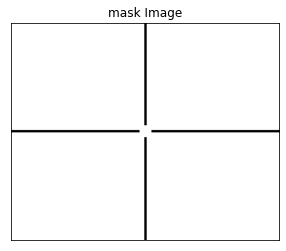

In [4]:
#creating mask
mask = np.ones((n,m,2),dtype=np.uint8)
cn = int((n+1)/2)
cm = int(m/2)
mask[cn-3:cn+3,0:cm-15]=0
mask[cn-3:cn+3,cm+15:m]=0
mask[0:cn-15,cm-3:cm+3]=0
mask[cn+15:n,cm-3:cm+3]=0
plt.imshow(mask[:,:,0],cmap='gray')
plt.title('mask Image'), plt.xticks([]), plt.yticks([])

In [5]:
#multiplying the mask and dft(shifted)
dft_shift1 *= mask
dft_shift2 *= mask
dft_shift3 *= mask

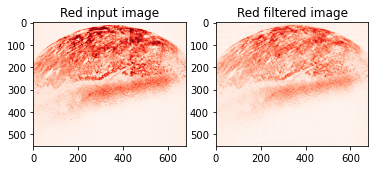

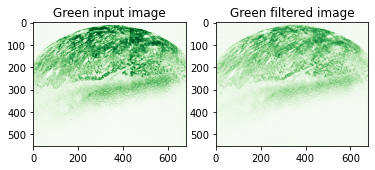

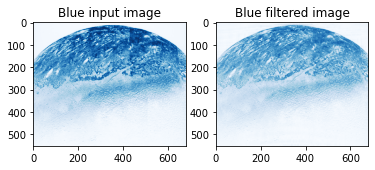

In [6]:
idft1=np.fft.ifftshift(dft_shift1) #shifting the dft again
idft1=cv2.idft(idft1) #taking the idft using Opencv function
fimg1=(cv2.magnitude(idft1[:,:,0],idft1[:,:,1])) #taking the magnitude of idft
plt.subplot(121)
plt.imshow(img1, cmap = 'Reds')
plt.title('Red input image')
plt.subplot(122)
plt.imshow(fimg1, cmap = 'Reds')
plt.title('Red filtered image')
plt.show()

idft2=np.fft.ifftshift(dft_shift2) #shifting the dft again
idft2=cv2.idft(idft2) #taking the idft using Opencv function
fimg2=(cv2.magnitude(idft2[:,:,0],idft2[:,:,1])) #taking the magnitude of idft
plt.subplot(121)
plt.imshow(img2, cmap = 'Greens')
plt.title('Green input image')
plt.subplot(122)
plt.imshow(fimg2, cmap = 'Greens')
plt.title('Green filtered image')
plt.show()

idft3=np.fft.ifftshift(dft_shift3) #shifting the dft again
idft3=cv2.idft(idft3) #taking the idft using Opencv function
fimg3=(cv2.magnitude(idft3[:,:,0],idft3[:,:,1])) #taking the magnitude of idft
plt.subplot(121)
plt.imshow(img3, cmap = 'Blues')
plt.title('Blue input image')
plt.subplot(122)
plt.imshow(fimg3, cmap = 'Blues')
plt.title('Blue filtered image')
plt.show()

In [7]:
print(np.max(fimg1))
print(np.min(fimg1))

121994700.0
4719.7974


We can see the maximum values of fimg are much higher than 8 bit . So we need to apply a linear filter to bring it down to 8 bits. We will divide by max and multiply by 255 for doing this

In [8]:
fimg1 = fimg1*255/(np.max(fimg1)) 
fimg2 = fimg2*255/(np.max(fimg2))
fimg3 = fimg3*255/(np.max(fimg3))

fimg1=fimg1.astype(np.uint8)
fimg2=fimg2.astype(np.uint8)
fomg3=fimg3.astype(np.uint8)

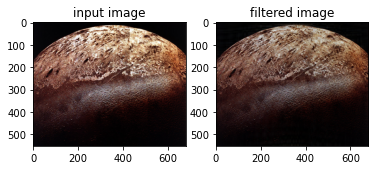

In [12]:
img_start = cv2.imread('planet.jpg')
img_start = cv2.cvtColor(img_start,cv2.COLOR_BGR2RGB)
img[:,:,0] = fimg3
img[:,:,1] = fimg2
img[:,:,2] = fimg1
#as cv2 given BGR values

plt.subplot(121)
plt.imshow(img_start, cmap = 'Blues')
plt.title('input image')
plt.subplot(122)
plt.imshow(img, cmap = 'Blues')
plt.title('filtered image')
plt.show()

In the final image, the straight line gone but there is hardly any effect on horizonal line. But again after applying the filtering the image becomes blurred.

## Part 4

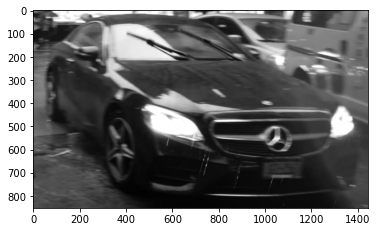

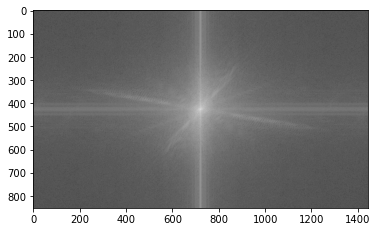

In [17]:
img = cv2.imread('car.jpg',0)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)  # to make the complex dft of the image
dft_shift = np.fft.fftshift(dft)                            #shift the dft image to the center

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # take the magnitude of the dft values(complex)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()


## Part 5

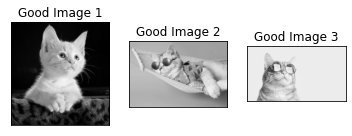

In [18]:
good1 = cv2.imread('good1.jpeg', 0)
good2 = cv2.imread('good2.jpg', 0)
good3 = cv2.imread('good3.jpg', 0)

bad1 = cv2.imread('bad1.jpg', 0)
bad2 = cv2.imread('bad2.jpg', 0)
bad3 = cv2.imread('bad3.jpg', 0)


plt.subplot(131),plt.imshow(good1, cmap = 'gray')
plt.title('Good Image 1'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(good2, cmap = 'gray')
plt.title('Good Image 2'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(good3, cmap = 'gray')
plt.title('Good Image 3'),plt.xticks([]),plt.yticks([])
plt.show()

In [19]:
img_float32 = np.float32(bad1)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)  # to make the complex dft of the image
dft_shift = np.fft.fftshift(dft)                            #shift the dft image to the center
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(magnitude_spectrum, cmap="gray")
plt.show()

We can see from spectrum that it is Guassian.

In [20]:
img_float32 = np.float32(bad2)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)  # to make the complex dft of the image
dft_shift = np.fft.fftshift(dft)                            #shift the dft image to the center
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # take the magnitude of the dft values(complex)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.show()

It is salt and pepper noise.

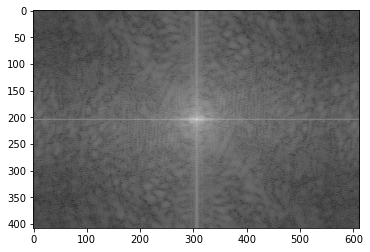

In [21]:
img_float32 = np.float32(bad3)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)  # to make the complex dft of the image
dft_shift = np.fft.fftshift(dft)                            #shift the dft image to the center
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # take the magnitude of the dft values(complex)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.show()
# this shows that this bad image is of contrast bad noise

It is hight contrast.

In [22]:
#adding gaussian noise to good1
row, col = good1.shape
# Gaussian distribution parameters
mean = 0
var = 220
sigma = var ** 0.5
gauss = np.random.normal(mean,sigma,(row,col))
noisy1 = gauss+good1
  
plt.imshow(good1, cmap='gray')
plt.show()
plt.imshow(noisy1, cmap='gray')
plt.show()

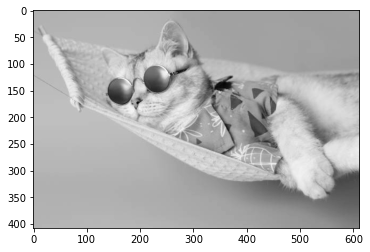

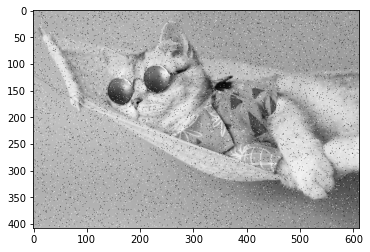

In [24]:
#
row , col = good2.shape
noisy2 = good2.copy()
for i in range(5000):
    x_c1=np.random.randint(0, row - 1)
    y_c1=np.random.randint(0, col - 1)
    x_c2=np.random.randint(0, row - 1)
    y_c2=np.random.randint(0, col - 1)
    noisy2[x_c1][y_c1] = 255
    noisy2[x_c2][y_c2] = 0

plt.imshow(good2, cmap='gray')
plt.show()
plt.imshow(noisy2, cmap='gray')
plt.show()

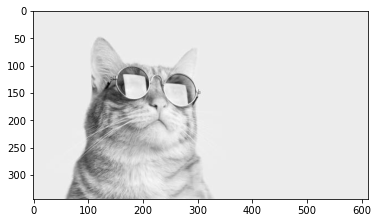

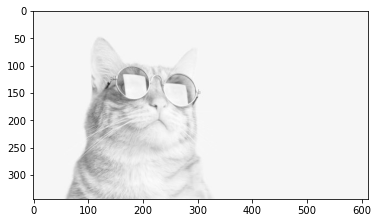

In [25]:
noisy3 = good3.copy()
gamma = 0.5
c = 255**(1-gamma)
noisy3 = (noisy3**gamma)*c
plt.imshow(good3, cmap='gray')
plt.show()
plt.imshow(noisy3, cmap='gray')
plt.show()